In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1,'/pd/maya/domino/domino')

In [29]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs

from plot import PALETTE, coherence_metric, EMB_PALETTE, generate_group_df

### Plots: Section 5.2 - Embeddings

In [23]:
df_synthetic_corr = generate_group_df(40598, 45159, "correlation")
df_synthetic_rare = generate_group_df(57203, 58676, "rare")
df_synthetic_nl = generate_group_df(63176, 64524, "noisy_label")

df = pd.concat([df_synthetic_corr, df_synthetic_rare, df_synthetic_nl])
df.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type,score_model_run_id
5311,41210,1,0,0.830594,0.6,0.56,0.52,0.038674,0.071823,0.151934,...,atelectasis,atelectasis=0_cardio_group=1,5311,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,bit,False,correlation,NaN
5373,41216,3,0,0.836570,0.9,0.80,0.59,0.052486,0.081492,0.140884,...,atelectasis,atelectasis=0_cardio_group=1,5373,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,clip,False,correlation,NaN
5354,41214,4,0,0.819692,0.6,0.52,0.44,0.030387,0.060773,0.116022,...,atelectasis,atelectasis=0_cardio_group=1,5354,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,imagenet,False,correlation,NaN
5383,41217,3,0,0.817203,0.2,0.28,0.44,0.020718,0.060773,0.122928,...,atelectasis,atelectasis=0_cardio_group=1,5383,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,mimic_multimodal,False,correlation,NaN
5460,41225,0,0,0.800520,0.7,0.60,0.56,0.058116,0.112224,0.186373,...,atelectasis,atelectasis=0_cardio_group=1,5460,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,domino.sdm.gmm.MixtureModelSDM,bit,False,correlation,NaN


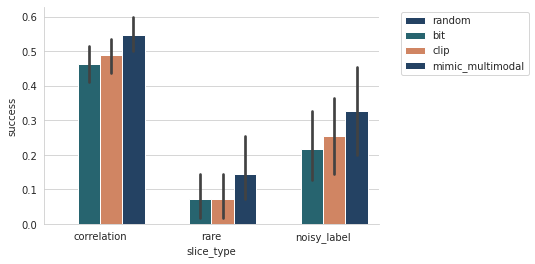

In [28]:
sns.barplot(
    data=df[df["sdm_class"] == "domino.sdm.gmm.MixtureModelSDM"],
    y="success",
    x="slice_type",
    hue="emb_type",
    hue_order=EMB_PALETTE.keys(),
    palette=sns.color_palette(EMB_PALETTE.values(), 3)
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
#plt.savefig("figures/08-01_bar.pdf")